In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import time

In [3]:
from textblob import TextBlob
import re
import pandas as pd

#读入数据
df = pd.read_csv('tweets.csv')
df['text']
text=df['text']

In [6]:
df.isnull().sum()

id                            0
handle                        0
text                          0
is_retweet                    0
original_author            5722
time                          0
in_reply_to_screen_name    6236
in_reply_to_status_id      6242
in_reply_to_user_id        6236
is_quote_status               0
lang                          0
retweet_count                 0
favorite_count                0
longitude                  6432
latitude                   6432
place_id                   6240
place_full_name            6240
place_name                 6240
place_type                 6240
place_country_code         6240
place_country              6240
place_contained_within     6240
place_attributes           6240
place_bounding_box         6240
source_url                    0
truncated                     0
entities                      0
extended_entities          5096
dtype: int64

In [8]:
df_clean = df.dropna(axis=1)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6444 non-null   int64 
 1   handle           6444 non-null   object
 2   text             6444 non-null   object
 3   is_retweet       6444 non-null   bool  
 4   time             6444 non-null   object
 5   is_quote_status  6444 non-null   bool  
 6   lang             6444 non-null   object
 7   retweet_count    6444 non-null   int64 
 8   favorite_count   6444 non-null   int64 
 9   source_url       6444 non-null   object
 10  truncated        6444 non-null   bool  
 11  entities         6444 non-null   object
dtypes: bool(3), int64(3), object(6)
memory usage: 472.1+ KB


In [10]:
df_clean.isnull().sum()

id                 0
handle             0
text               0
is_retweet         0
time               0
is_quote_status    0
lang               0
retweet_count      0
favorite_count     0
source_url         0
truncated          0
entities           0
dtype: int64

In [12]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    
    # Convert to lowercase (case-folding)
    text = text.lower()
    
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

df_clean['text_clean'] = text.apply(preprocess_text)



/var/folders/ht/25h0hfg94gv6vdxwdhkn_53m0000gn/T/ipykernel_19056/568489763.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_clean'] = text.apply(preprocess_text)


In [14]:
# 提取@HillaryClinton和@realDonaldTrump的推文
hillary_tweets = df_clean[df_clean['handle'] == 'HillaryClinton']['text_clean']
trump_tweets = df_clean[df_clean['handle'] == 'realDonaldTrump']['text_clean']

# 将每个分类中的推文组合为一个大的字符串
hillary_text = ' '.join(hillary_tweets)
trump_text = ' '.join(trump_tweets)


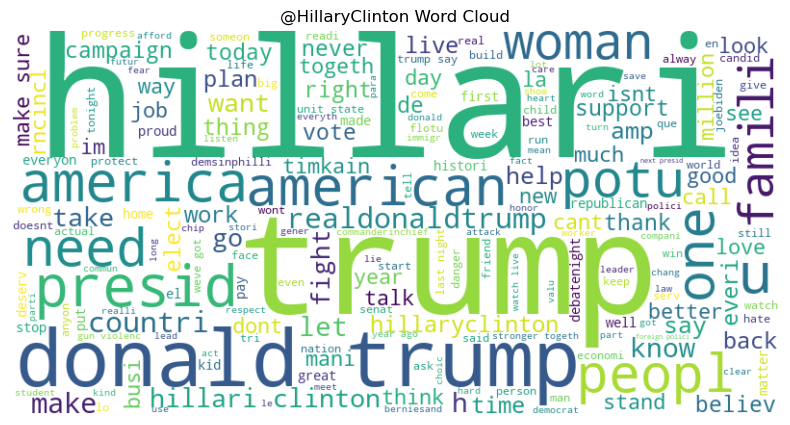

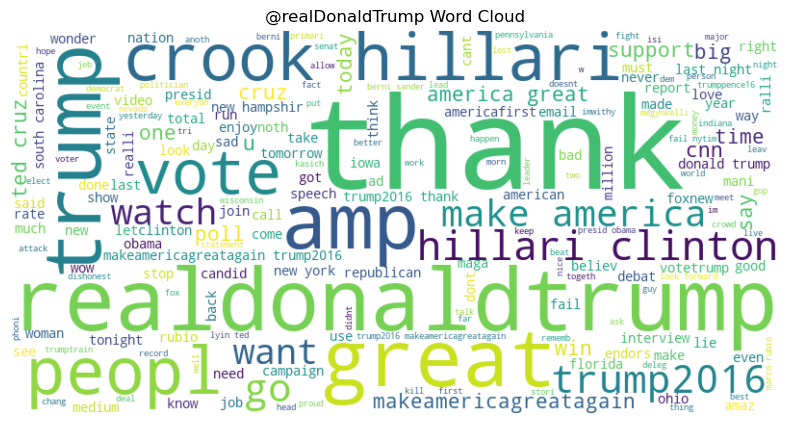

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for Hillary's tweets
hillary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hillary_text)

# Generate word cloud for Trump's tweets
trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trump_text)

# Display Hillary's word cloud
plt.figure(figsize=(10, 5))
plt.imshow(hillary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('@HillaryClinton Word Cloud')
plt.show()

# Display Trump's word cloud
plt.figure(figsize=(10, 5))
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('@realDonaldTrump Word Cloud')
plt.show()


In [18]:
# Ensure the 'time' column is converted to datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Check for any values that failed to convert
invalid_dates = df[df['time'].isnull()]

# If there are invalid dates, you can print them out for manual inspection
print(invalid_dates[['text', 'time']])

# Drop invalid time values (if any)
df = df.dropna(subset=['time'])

# Proceed with sentiment analysis and other steps
df['date'] = df['time'].dt.date

# Continue with visualization and further analysis


Empty DataFrame
Columns: [text, time]
Index: []


In [20]:
# Sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df_clean['sentiment'] = df_clean['text_clean'].apply(get_sentiment)

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the sentiment analysis results
print(df_clean[['handle','text_clean', 'sentiment']]) 

               handle                                         text_clean  \
0      HillaryClinton    question elect put plan action make life better   
1      HillaryClinton  last night donald trump said pay tax smart kno...   
2      HillaryClinton  couldnt proud hillaryclinton vision command la...   
3      HillaryClinton  stand togeth there noth cant make sure your re...   
4      HillaryClinton  candid ask theyd confront racial injustic one ...   
5     realDonaldTrump  join 3pm ralli tomorrow midamerica center coun...   
6      HillaryClinton  elect import sit go make sure your regist nati...   
7      HillaryClinton                    donald trump goe lowregist vote   
8     realDonaldTrump                   govern peopl join movement today   
9      HillaryClinton  3 trump offer singl propos reduc friction star...   
10     HillaryClinton     elect week away check your regist vote take cl   
11    realDonaldTrump  nation voterregistrationday make sure your reg...   
12    realDo

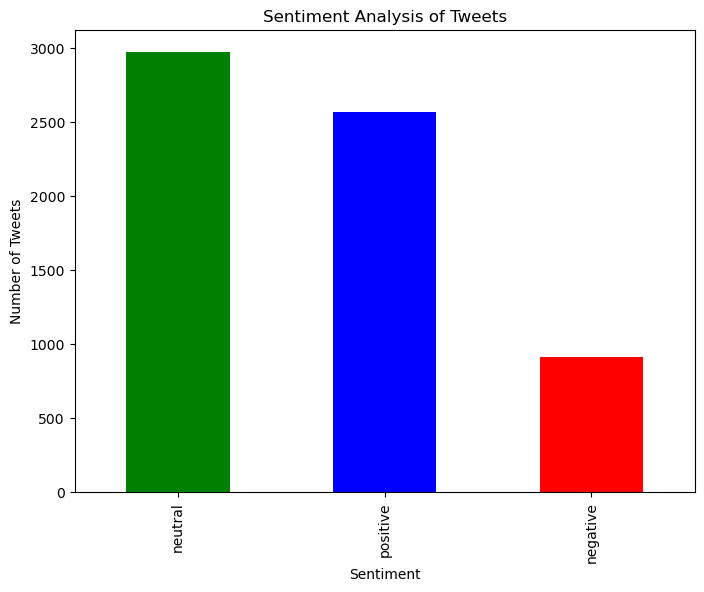

In [22]:
import matplotlib.pyplot as plt

# Count the number of tweets for each sentiment category
sentiment_counts = df_clean['sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [24]:
# Convert the 'date' column to date format
df_clean['time'] = pd.to_datetime(df_clean['time']).dt.date

# Filter out Trump's and Hillary's tweets
trump_df = df_clean[df_clean['handle'] == 'realDonaldTrump']
hillary_df = df_clean[df_clean['handle'] == 'HillaryClinton']

# Calculate the daily average number of favorites and retweets
trump_favorites = trump_df.groupby('time')['favorite_count'].mean().reset_index(name='Trump_favorites')
hillary_favorites = hillary_df.groupby('time')['favorite_count'].mean().reset_index(name='Hillary_favorites')
trump_retweets = trump_df.groupby('time')['retweet_count'].mean().reset_index(name='Trump_retweets')
hillary_retweets = hillary_df.groupby('time')['retweet_count'].mean().reset_index(name='Hillary_retweets')

# Merge Trump's and Hillary's favorite counts into one DataFrame
df_favorites = pd.merge(trump_favorites, hillary_favorites, on='time', how='outer')

# Merge Trump's and Hillary's retweet counts into another DataFrame
df_retweets = pd.merge(trump_retweets, hillary_retweets, on='time', how='outer')

# Fill missing values
df_favorites.fillna(0, inplace=True)
df_retweets.fillna(0, inplace=True)


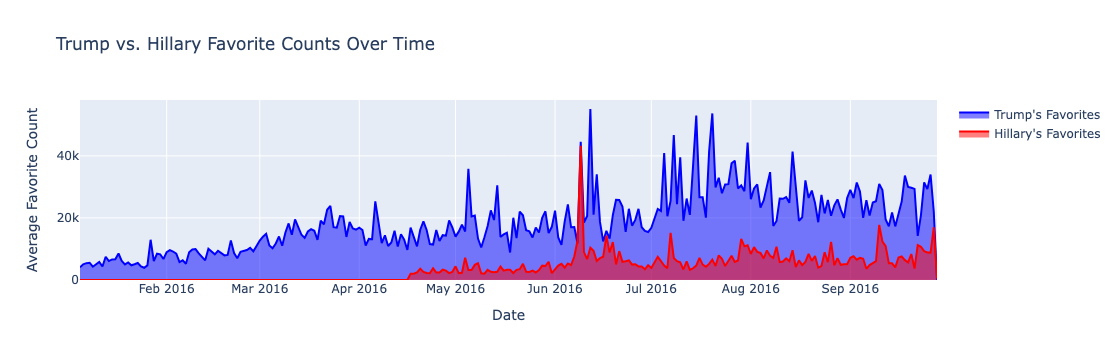

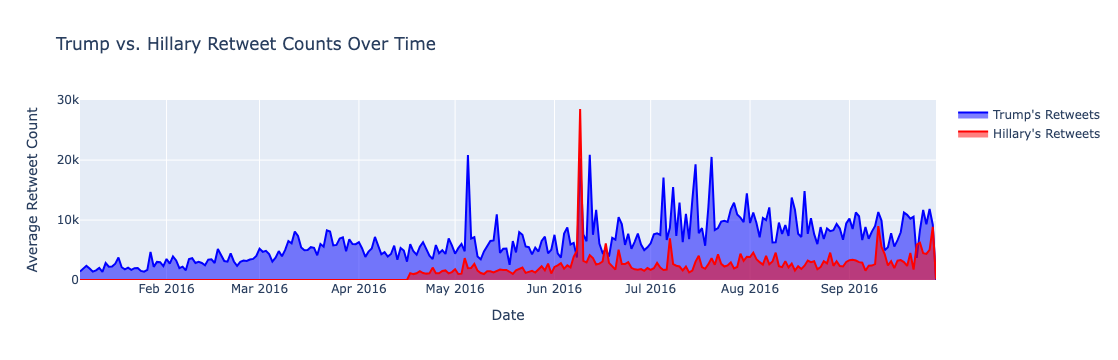

In [26]:
import plotly.graph_objects as go

# Plot area chart for favorite counts
fig_favorites_area = go.Figure()

# Add Trump's favorite count area chart
fig_favorites_area.add_trace(go.Scatter(x=df_favorites['time'], y=df_favorites['Trump_favorites'],
                    fill='tozeroy', name="Trump's Favorites", line=dict(color='blue')))

# Add Hillary's favorite count area chart
fig_favorites_area.add_trace(go.Scatter(x=df_favorites['time'], y=df_favorites['Hillary_favorites'],
                    fill='tozeroy', name="Hillary's Favorites", line=dict(color='red')))

# Update layout
fig_favorites_area.update_layout(title='Trump vs. Hillary Favorite Counts Over Time',
                            xaxis_title='Date',
                            yaxis_title='Average Favorite Count')

# Display the favorite count area chart
fig_favorites_area.show()

# Plot area chart for retweet counts
fig_retweets_area = go.Figure()

# Add Trump's retweet count area chart
fig_retweets_area.add_trace(go.Scatter(x=df_retweets['time'], y=df_retweets['Trump_retweets'],
                    fill='tozeroy', name="Trump's Retweets", line=dict(color='blue')))

# Add Hillary's retweet count area chart
fig_retweets_area.add_trace(go.Scatter(x=df_retweets['time'], y=df_retweets['Hillary_retweets'],
                    fill='tozeroy', name="Hillary's Retweets", line=dict(color='red')))

# Update layout
fig_retweets_area.update_layout(title='Trump vs. Hillary Retweet Counts Over Time',
                            xaxis_title='Date',
                            yaxis_title='Average Retweet Count')

# Display the retweet count area chart
fig_retweets_area.show()


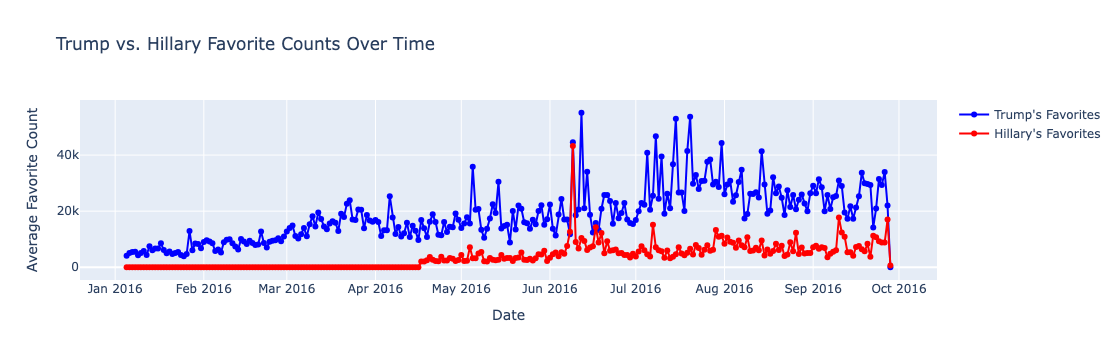

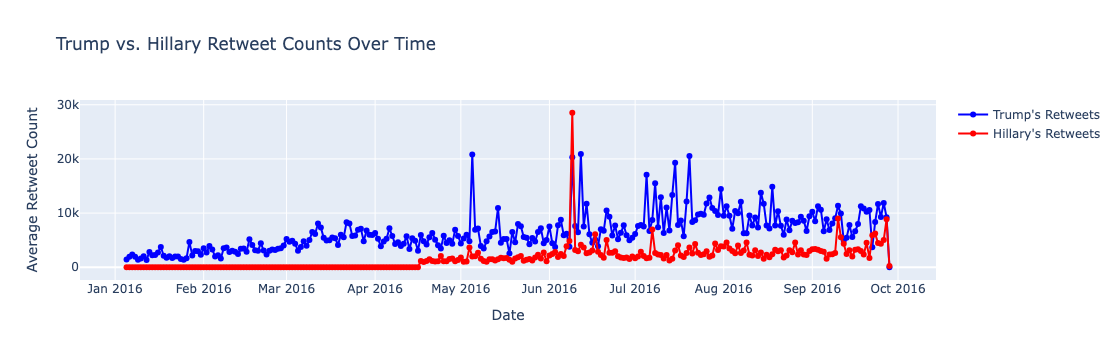

In [28]:
import plotly.graph_objects as go

# Plot connected scatter plot for favorite counts
fig_favorites_scatter = go.Figure()

# Add Trump's favorite count connected scatter plot
fig_favorites_scatter.add_trace(go.Scatter(x=df_favorites['time'], y=df_favorites['Trump_favorites'],
                    mode='lines+markers', name="Trump's Favorites", marker=dict(color='blue'), line=dict(color='blue')))

# Add Hillary's favorite count connected scatter plot
fig_favorites_scatter.add_trace(go.Scatter(x=df_favorites['time'], y=df_favorites['Hillary_favorites'],
                    mode='lines+markers', name="Hillary's Favorites", marker=dict(color='red'), line=dict(color='red')))

# Update layout
fig_favorites_scatter.update_layout(title='Trump vs. Hillary Favorite Counts Over Time',
                            xaxis_title='Date',
                            yaxis_title='Average Favorite Count')

# Display the favorite count connected scatter plot
fig_favorites_scatter.show()

# Plot connected scatter plot for retweet counts
fig_retweets_scatter = go.Figure()

# Add Trump's retweet count connected scatter plot
fig_retweets_scatter.add_trace(go.Scatter(x=df_retweets['time'], y=df_retweets['Trump_retweets'],
                    mode='lines+markers', name="Trump's Retweets", marker=dict(color='blue'), line=dict(color='blue')))

# Add Hillary's retweet count connected scatter plot
fig_retweets_scatter.add_trace(go.Scatter(x=df_retweets['time'], y=df_retweets['Hillary_retweets'],
                    mode='lines+markers', name="Hillary's Retweets", marker=dict(color='red'), line=dict(color='red')))

# Update layout
fig_retweets_scatter.update_layout(title='Trump vs. Hillary Retweet Counts Over Time',
                            xaxis_title='Date',
                            yaxis_title='Average Retweet Count')

# Display the retweet count connected scatter plot
fig_retweets_scatter.show()


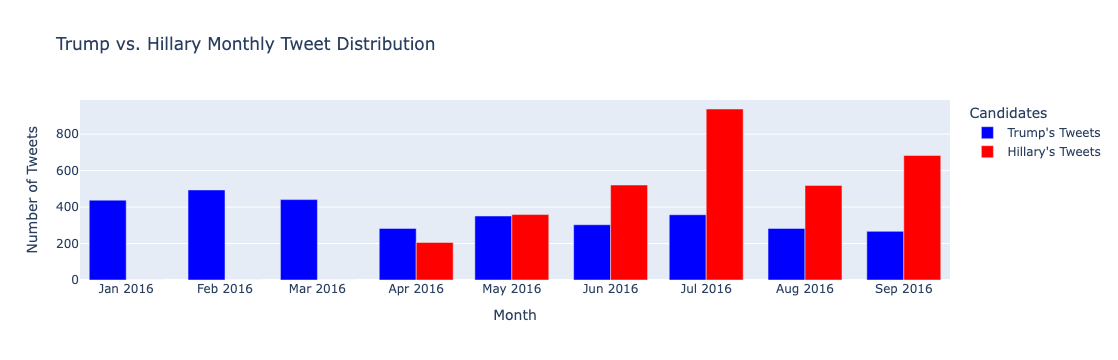

In [30]:
import pandas as pd
import plotly.graph_objects as go

# Convert 'time' column to datetime format (ensure it's a string first)
df_clean['time'] = pd.to_datetime(df_clean['time'], errors='coerce')  # Convert 'time' column to datetime format

# Extract the month from each tweet
df_clean['month'] = df_clean['time'].dt.to_period('M')

# Calculate the number of tweets per month for Trump and Hillary
trump_monthly_tweets = df_clean[df_clean['handle'] == 'realDonaldTrump'].groupby('month').size().reset_index(name='Trump_tweets')
hillary_monthly_tweets = df_clean[df_clean['handle'] == 'HillaryClinton'].groupby('month').size().reset_index(name='Hillary_tweets')

# Merge the two datasets into one DataFrame, aligning by month
df_monthly_tweets = pd.merge(trump_monthly_tweets, hillary_monthly_tweets, on='month', how='outer')

# Fill missing values
df_monthly_tweets.fillna(0, inplace=True)

# Create bar chart
fig = go.Figure()

# Add Trump's tweet count bar chart
fig.add_trace(go.Bar(
    x=df_monthly_tweets['month'].astype(str), 
    y=df_monthly_tweets['Trump_tweets'], 
    name="Trump's Tweets",
    marker_color='blue'
))

# Add Hillary's tweet count bar chart
fig.add_trace(go.Bar(
    x=df_monthly_tweets['month'].astype(str), 
    y=df_monthly_tweets['Hillary_tweets'], 
    name="Hillary's Tweets",
    marker_color='red'
))

# Update the chart layout
fig.update_layout(
    title='Trump vs. Hillary Monthly Tweet Distribution',
    xaxis_title='Month',
    yaxis_title='Number of Tweets',
    barmode='group',  # Display bars side by side
    legend_title='Candidates'
)

# Display the chart
fig.show()


In [32]:
from textblob import TextBlob
import pandas as pd

# Define sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Perform sentiment analysis on each tweet
df_clean['sentiment'] = df_clean['text'].apply(analyze_sentiment)

# Calculate the daily average sentiment score for both Trump and Hillary
daily_sentiment = df_clean.groupby(['time', 'handle']).agg(
    avg_sentiment=('sentiment', 'mean')
).reset_index()

# Separate the data for Trump and Hillary
trump_sentiment = daily_sentiment[daily_sentiment['handle'] == 'realDonaldTrump']
hillary_sentiment = daily_sentiment[daily_sentiment['handle'] == 'HillaryClinton']


In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from textblob import TextBlob

# Convert 'time' column to date format
df_clean['time'] = pd.to_datetime(df_clean['time']).dt.date

# Text cleaning (removing punctuation, stop words, etc.) and vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['text_clean'])

# Perform topic modeling using NMF
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

# Extract the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
topics = []
for topic in nmf_model.components_:
    topics.append([terms[i] for i in topic.argsort()[-20:]])

# Display the topics
for i, topic in enumerate(topics, 0):
    print(f"Topic {i}: {topic}")


Topic 0: ['love', 'pennsylvania', 'trumppence16', 'amp', 'trump2016', 'ohio', 'carolina', 'hampshir', 'florida', 'great', 'votetrump', 'maga', 'soon', 'realdonaldtrump', 'poll', 'imwithy', 'support', 'new', 'americafirst', 'thank']
Topic 1: ['campaign', 'vote', 'woman', 'said', 'think', 'thing', 'know', 'peopl', 'rncincl', 'busi', 'plan', 'like', 'let', 'tax', 'american', 'say', 'presid', 'realdonaldtrump', 'donald', 'trump']
Topic 2: ['work', 'poll', 'today', 'crowd', 'americafirst', 'countri', 'votetrump', 'sure', 'day', 'amp', 'big', 'job', 'let', 'togeth', 'realdonaldtrump', 'vote', 'safe', 'make', 'great', 'america']
Topic 3: ['time', 'today', 'need', 'job', 'work', 'know', 'american', 'amp', 'countri', 'potu', 'live', 'woman', 'vote', 'want', 'watch', 'peopl', 'presid', 'crook', 'clinton', 'hillari']
Topic 4: ['louisiana', 'iowa', 'pennsylvania', 'enjoy', 'california', 'trumptrain', 'ticket', 'arizona', 'poll', 'york', 'supertuesday', 'iacaucu', 'indiana', 'video', 'votetrump', '

In [36]:
# Combine the tweets of each day into a single text for topic extraction
df_grouped = df_clean.groupby('time')['text_clean'].apply(lambda x: ' '.join(x)).reset_index()

# Perform topic modeling on the grouped tweets for each date
tfidf_matrix_grouped = tfidf_vectorizer.transform(df_grouped['text_clean'])
nmf_topics_grouped = nmf_model.transform(tfidf_matrix_grouped)

# Assign the most dominant topic for each date
df_grouped['topic'] = nmf_topics_grouped.argmax(axis=1)

# View the first few rows of data
df_grouped


time                                         text_clean  topic
0    2016-01-05  longtalltexan20 realdonaldtrump love trump cal...      2
1    2016-01-06  believ unionlead nh demand ad look enclos lett...      1
2    2016-01-07  im leav burlington vermont wild joy behar fire...      2
3    2016-01-08  venu wonder south carolina soon big traffic ba...      2
4    2016-01-09  im protest unionlead anyth w abc debat uneth r...      0
5    2016-01-10  union leader refus comment kick abc news debat...      3
6    2016-01-11  fallontonight jimmyfallon nbc 1135pme enjoy tr...      4
7    2016-01-12  anoth new iowa poll releas thank iacaucu fitn ...      3
8    2016-01-13  thank votetrump thank iowa highli respect oann...      4
9    2016-01-14  wsjnbc poll donald trump widen lead republican...      1
10   2016-01-15  jusr watch harveypitt teamcavuto great donaldj...      2
11   2016-01-16  new york ted cruz talk amp demean wow ted cruz...      3
12   2016-01-17  selffund campaign put money control cruz spend...      3
13   2016-01-18  love liberti univers today record set crowd un...      0
14   2016-01-19  palin brand among evangel gold faucet trump to...      3
15   2016-01-20  new cnnwmur new hampshir poll releas thank fit...      4
16   2016-01-21  trump2016 makeamericagreatagain thank new hamp...      4
17   2016-01-22  ted cruz went big releas reuter poll what go g...      4
18   2016-01-23  left great event pella go church tomorrow musc...      2
19   2016-01-24  joenbc canada goldman sach kitchen sink trump ...      1
20   2016-01-25  land new hampshir venu shortli fitn realdonald...      4
21   2016-01-26  pathet attempt foxnew tri build rate gopdeb wi...      4
22   2016-01-27  childishli written amp taunt pr statement fox ...      4
23   2016-01-28  donald trump hand bill oreilli cabl tv viewers...      1
24   2016-01-29  new email releas disast hillari clinton minimu...      0
25   2016-01-30  make america great iacaucu caucusfortrump iaca...      2
26   2016-01-31  donaldjtrumpjr amp wife mrsvanessatrump attend...      3
27   2016-02-01  cedar rapid trump daught ivanka say without eq...      2
28   2016-02-02  way new hampshir expect big spirit crowd fitn ...      2
29   2016-02-03  construct win realdonaldtrump clewandowski_ da...      3
30   2016-02-04  interview anderson cooper 8pm cnn new hampshir...      3
31   2016-02-05  dharmabum77 donald trump love america love ame...      2
32   2016-02-06  debat readi realdonaldtrump makeamericagreatag...      2
33   2016-02-07  new hampshir great time love gopdeb last night...      1
34   2016-02-08  votetrumpnh nhprimari fitn bush wast 120 milli...      2
35   2016-02-09  stop heroin drug come new hampshir open southe...      2
36   2016-02-10  big speech tonight south carolina 700 pm treme...      0
37   2016-02-11  truthinvest cnn tedcruz realdonaldtrump ted cr...      4
38   2016-02-12  makeamericagreatagain million fals ad paid lob...      4
39   2016-02-13  total unexpect loss suprem court justic antoni...      2
40   2016-02-14  ted cruz along jeb bush push justic john rober...      3
41   2016-02-15  thank continu support makeamericagreatagain re...      3
42   2016-02-16  interview stephenathom tonight phone late show...      0
43   2016-02-17  join u tomorrow kiawah south carolina scprimar...      4
44   2016-02-18  join u saturday night south carolina primari w...      4
45   2016-02-19  make america great finish two major speech sou...      4
46   2016-02-20  carrollkuykend2 veteran vote realdonaldtrump s...      2
47   2016-02-21  nevada way votetrumpnv trump2016 caucu locat b...      0
48   2016-02-22  ted cruz disqualifi fraudul win iowa weak rnc ...      3
49   2016-02-23  thank spark nevada votetrumpnv nevadacaucu fin...      0
50   2016-02-24  ted cruz quit race field begin clear get vote ...      2
51   2016-02-25  thank makeamericagreatagain trump2016 fmr pre ...      4
52   2016-02-26  thank texa 10000 amaz support trump2016 makeam...      4
53   2016-02-27

In [40]:
# Find the date with the highest sentiment score for each month
df_clean['month'] = pd.to_datetime(df_clean['time']).dt.to_period('M')
trump_max_sentiment = df_clean[df_clean['handle'] == 'realDonaldTrump'].groupby('month').apply(lambda x: x.loc[x['sentiment'].idxmax()])
hillary_max_sentiment = df_clean[df_clean['handle'] == 'HillaryClinton'].groupby('month').apply(lambda x: x.loc[x['sentiment'].idxmax()])

# Merge with the topic data
trump_max_sentiment = trump_max_sentiment.merge(df_grouped[['time', 'topic']], on='time', how='left')
hillary_max_sentiment = hillary_max_sentiment.merge(df_grouped[['time', 'topic']], on='time', how='left')

# Check if the merge was successful
trump_max_sentiment


/var/folders/ht/25h0hfg94gv6vdxwdhkn_53m0000gn/T/ipykernel_19056/2097027634.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/ht/25h0hfg94gv6vdxwdhkn_53m0000gn/T/ipykernel_19056/2097027634.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



id           handle  \
0  693471204469035008  realDonaldTrump   
1  704100078743625729  realDonaldTrump   
2  714899439706574848  realDonaldTrump   
3  725378591567941632  realDonaldTrump   
4  737376803514286081  realDonaldTrump   
5  748163517455413248  realDonaldTrump   
6  758491947409481728  realDonaldTrump   
7  768624405777944576  realDonaldTrump   
8  777908242538196992  realDonaldTrump   

                                                text  is_retweet        time  \
0  MAKE AMERICA GREAT AGAIN! \n#IACaucus #CaucusF...       False  2016-01-30   
1  THANK YOU ALABAMA! 32,000 supporters tonight. ...       False  2016-02-29   
2  MAKE AMERICA GREAT AGAIN!\nhttps://t.co/0w4ldD...       False  2016-03-29   
3  Thank you! WE will MAKE AMERICA GREAT AGAIN! h...       False  2016-04-27   
4          I hope everyone had a great Memorial Day!       False  2016-05-30   
5  Just watched Senator John Barrasso on @FoxNews...       False  2016-06-29   
6  Shooting deaths of police officers up 78% this...       False  2016-07-28   
7  Thoughts and prayers to the great people of In...       False  2016-08-25   
8  Great job once again by law enforcement! We ar...       False  2016-09-19   

   is_quote_status lang  retweet_count  favorite_count  \
0            False   en           2951            6913   
1            False   en           6984           18024   
2            False   en           6159           14227   
3             True   en           3536           10986   
4            False   en           5222           21437   
5            False   en           2673            9957   
6            False   en          20687           64143   
7            False   en           7933           27276   
8            False   en          16413           49182   

                            source_url  truncated  \
0   http://twitter.com/download/iphone      False   
1   http://twitter.com/download/iphone      False   
2   http://twitter.com/download/iphone      False   
3   http://twitter.com/download/iphone      False   
4  http://twitter.com/download/android      False   
5  http://twitter.com/download/android      False   
6   http://twitter.com/download/iphone      False   
7   http://twitter.com/download/iphone      False   
8   http://twitter.com/download/iphone      False   

                                            entities  \
0  {'media': [{'display_url': 'pic.twitter.com/Ir...   
1  {'media': [{'display_url': 'pic.twitter.com/rO...   
2  {'user_mentions': [], 'symbols': [], 'urls': [...   
3  {'user_mentions': [], 'symbols': [], 'urls': [...   
4  {'user_mentions': [], 'symbols': [], 'urls': [...   
5  {'user_mentions': [{'id_str': '1367531', 'name...   
6  {'user_mentions': [], 'symbols': [], 'urls': [...   
7  {'user_mentions': [], 'symbols': [], 'urls': [...   
8  {'user_mentions': [], 'symbols': [], 'urls': [...   

                                          text_clean  sentiment    month  \
0          make america great iacaucu caucusfortrump        1.0  2016-01   
1  thank alabama 32000 support tonight get amp vo...        1.0  2016-02   
2                                 make america great        1.0  2016-03   
3                           thank make america great        1.0  2016-04   
4                      hope everyon great memori day        1.0  2016-05   
5  watch senat john barrasso foxnew great thank john        1.0  2016-06   
6  shoot death polic offic 78 year must restor la...        1.0  2016-07   
7         thought prayer great peopl indiana prevail        1.0  2016-08   
8  great job law enforc proud embrac without dont...        1.0  2016-09   

   topic  
0      2  
1      4  
2      2  
3      3  
4      1  
5      3  
6      3  
7      1  
8      3

In [56]:
# Find the date with the highest sentiment score for each month
df_clean['month'] = pd.to_datetime(df_clean['time']).dt.to_period('M')

# Group by month and find the date with the highest sentiment score
trump_max_sentiment = df_clean[df_clean['handle'] == 'realDonaldTrump'].groupby('month').apply(lambda x: x.loc[x['sentiment'].idxmax()])
hillary_max_sentiment = df_clean[df_clean['handle'] == 'HillaryClinton'].groupby('month').apply(lambda x: x.loc[x['sentiment'].idxmax()])

# Merge with the topic data
trump_max_sentiment = trump_max_sentiment.merge(df_grouped[['time', 'topic']], on='time', how='left')
hillary_max_sentiment = hillary_max_sentiment.merge(df_grouped[['time', 'topic']], on='time', how='left')

# Map topic numbers to meaningful names for better readability
topic_names = {0: 'Economy', 1: 'Health', 2: 'Jobs', 3: 'Immigration', 4: 'Security'}
trump_max_sentiment['theme'] = trump_max_sentiment['topic'].map(topic_names)
hillary_max_sentiment['theme'] = hillary_max_sentiment['topic'].map(topic_names)

# View the result
trump_max_sentiment


/var/folders/ht/25h0hfg94gv6vdxwdhkn_53m0000gn/T/ipykernel_19056/2308308360.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/ht/25h0hfg94gv6vdxwdhkn_53m0000gn/T/ipykernel_19056/2308308360.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



handle                                         text_clean  \
0  realDonaldTrump  keksec__org realdonaldtrump said best makeamer...   
1  realDonaldTrump  itsblakec realdonaldtrump trump geniu rubio cr...   
2  realDonaldTrump  adriparsonss the_trump_train realdonaldtrump d...   
3  realDonaldTrump  alexnightrasor realdonaldtrump lilrachiepoo tr...   
4  realDonaldTrump  thydanielflor megynkelli realdonaldtrump best ...   
5  realDonaldTrump  jerryjrfalwel impress realdonaldtrump speech y...   
6  realDonaldTrump  trumpdoonbeg great news weve nomin ireland bes...   
7  realDonaldTrump  land iowa attend great event honor wonder sena...   
8  realDonaldTrump  donald trump birther event greatest trick he e...   

         time  is_retweet  sentiment sentiment_category    month  topic  \
0  2016-01-24       False        1.0           Positive  2016-01      1   
1  2016-02-27       False        0.9           Positive  2016-02      3   
2  2016-03-11       False        1.0           Positive  2016-03      0   
3  2016-04-09       False        1.0           Positive  2016-04      1   
4  2016-05-18       False        1.0           Positive  2016-05      1   
5  2016-06-23        True        1.0           Positive  2016-06      3   
6  2016-07-17       False        0.9           Positive  2016-07      3   
7  2016-08-27       False        0.8           Positive  2016-08      1   
8  2016-09-17       False        1.0           Positive  2016-09      3   

         theme  
0       Health  
1  Immigration  
2      Economy  
3       Health  
4       Health  
5  Immigration  
6  Immigration  
7       Health  
8  Immigration

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for Hillary's tweets
hillary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trump_max_sentiment)

# Generate word cloud for Trump's tweets
trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hillary_max_sentiment)

# Display Hillary's word cloud
plt.figure(figsize=(10, 5))
plt.imshow(hillary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('@HillaryClinton Word Cloud')
plt.show()

# Display Trump's word cloud
plt.figure(figsize=(10, 5))
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('@realDonaldTrump Word Cloud')
plt.show()

TypeError: expected string or bytes-like object, got 'DataFrame'

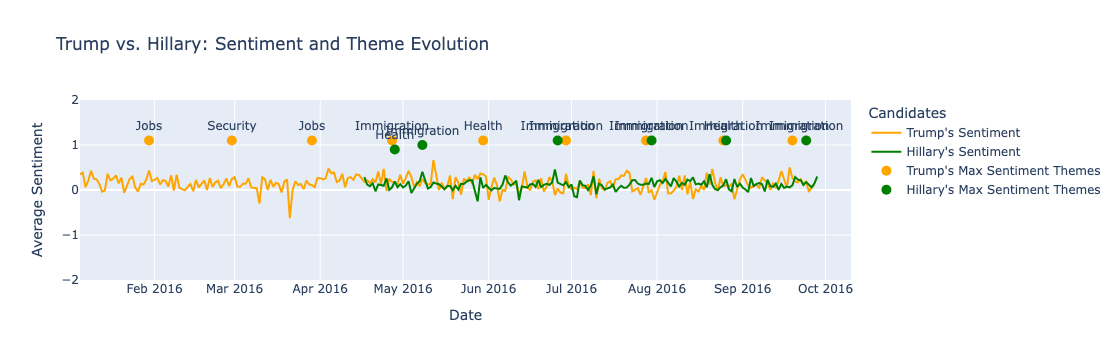

In [44]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Trump's sentiment line
fig.add_trace(go.Scatter(
    x=trump_sentiment['time'], 
    y=trump_sentiment['avg_sentiment'], 
    mode='lines', 
    name="Trump's Sentiment",
    line=dict(color='orange')
))

# Hillary's sentiment line
fig.add_trace(go.Scatter(
    x=hillary_sentiment['time'], 
    y=hillary_sentiment['avg_sentiment'], 
    mode='lines', 
    name="Hillary's Sentiment",
    line=dict(color='green')
))

# Annotate Trump's max sentiment points each month with themes
fig.add_trace(go.Scatter(
    x=trump_max_sentiment['time'], 
    y=trump_max_sentiment['sentiment'] + 0.1,  # Slightly raise the annotation position
    mode='markers+text', 
    name="Trump's Max Sentiment Themes",
    text=trump_max_sentiment['theme'], 
    textposition="top center",
    marker=dict(color='orange', size=10)
))

# Annotate Hillary's max sentiment points each month with themes
fig.add_trace(go.Scatter(
    x=hillary_max_sentiment['time'], 
    y=hillary_max_sentiment['sentiment'] + 0.1,  # Slightly raise the annotation position
    mode='markers+text', 
    name="Hillary's Max Sentiment Themes",
    text=hillary_max_sentiment['theme'], 
    textposition="top center",
    marker=dict(color='green', size=10)
))

# Update layout
fig.update_layout(
    title='Trump vs. Hillary: Sentiment and Theme Evolution',
    xaxis_title='Date',
    yaxis_title='Average Sentiment',
    legend_title='Candidates',
    yaxis=dict(range=[-2, 2])
)

# Show the figure
fig.show()


In [46]:
# Convert the 'time' column to datetime format
df_clean['time'] = pd.to_datetime(df_clean['time'])

# Keep only relevant columns
df_clean = df_clean[['handle', 'text_clean', 'time', 'is_retweet']]

# Function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df_clean['sentiment'] = df_clean['text_clean'].apply(get_sentiment)

# Add a column to classify sentiment
df_clean['sentiment_category'] = pd.cut(df_clean['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])


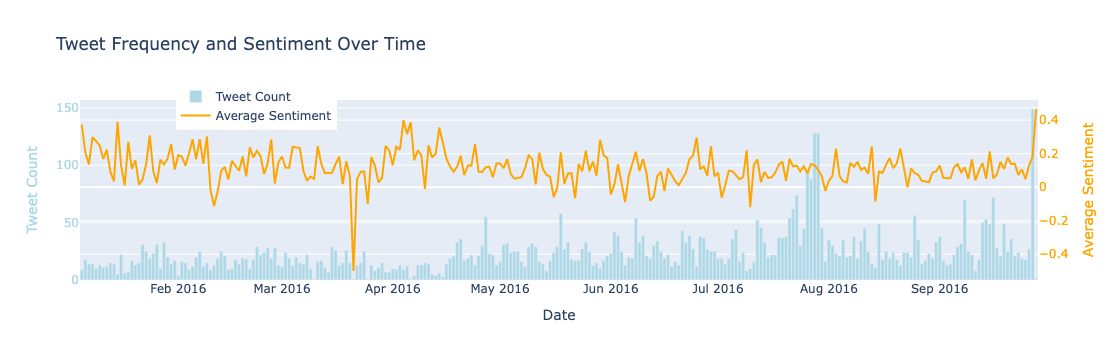

In [48]:
# Resample the data by day to analyze tweet frequency and daily average sentiment
tweets_daily = df_clean.resample('D', on='time').agg({
    'text_clean': 'count',  # the number of tweet 
    'sentiment': 'mean'  # the average of sentiment
}).rename(columns={'text_clean': 'tweet_count'})

# Create an interactive figure
fig = go.Figure()

# Add tweet count as a bar chart (left y-axis)
fig.add_trace(go.Bar(
    x=tweets_daily.index,
    y=tweets_daily['tweet_count'],
    name='Tweet Count',
    marker_color='lightblue',
    yaxis='y'
))

# Add average sentiment as a line chart (right y-axis)
fig.add_trace(go.Scatter(
    x=tweets_daily.index,
    y=tweets_daily['sentiment'],
    mode='lines',
    name='Average Sentiment',
    line=dict(color='orange'),
    yaxis='y2'
))

# Update layout for double y-axis
fig.update_layout(
    title="Tweet Frequency and Sentiment Over Time",
    xaxis=dict(title='Date'),
    yaxis=dict(
        title='Tweet Count',
        titlefont=dict(color='lightblue'),
        tickfont=dict(color='lightblue'),
    ),
    yaxis2=dict(
        title='Average Sentiment',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right',
    ),
    legend=dict(x=0.1, y=1.1),
    bargap=0.1,
    hovermode="x"  # Enables synchronized hover for both y-axes
)

# Show interactive plot
fig.show()

In [52]:
import pandas as pd
from textblob import TextBlob

# 分别获取特朗普和希拉里的情感
trump_sentiment = daily_sentiment[daily_sentiment['handle'] == 'realDonaldTrump']
hillary_sentiment = daily_sentiment[daily_sentiment['handle'] == 'HillaryClinton']

# 找到情感波动最大的时间点（最低或最高）
critical_moment_trump = trump_sentiment.loc[trump_sentiment['avg_sentiment'].idxmax()]
critical_moment_hillary = hillary_sentiment.loc[hillary_sentiment['avg_sentiment'].idxmax()]

print("Trump's critical moment:", critical_moment_trump)
print("Hillary's critical moment:", critical_moment_hillary)

# 在关键时刻查找特朗普的推文
trump_critical_tweets = df_clean[(df_clean['handle'] == 'realDonaldTrump') & (df_clean['time'] == critical_moment_trump['time'])]
print("Trump's critical tweets:\n", trump_critical_tweets[['text_clean', 'sentiment']])

# 在关键时刻查找希拉里的推文
hillary_critical_tweets = df_clean[(df_clean['handle'] == 'HillaryClinton') & (df_clean['time'] == critical_moment_hillary['time'])]
print("Hillary's critical tweets:\n", hillary_critical_tweets[['text_clean', 'sentiment']])



Trump's critical moment: time             2016-05-12 00:00:00
handle               realDonaldTrump
avg_sentiment                 0.6625
Name: 154, dtype: object
Hillary's critical moment: time             2016-06-25 00:00:00
handle                HillaryClinton
avg_sentiment               0.455556
Name: 241, dtype: object
Trump's critical tweets:
                                              text_clean  sentiment
4298  great meet senatemajldr mitch mcconnel republi...        0.8
4300  great day dc speakerryan republican leadership...        0.8
Hillary's critical tweets:
                                              text_clean  sentiment
3200  enter chanc win ticket join hillaryclinton ham...   0.800000
3201                               lgbt commun love hfa   0.500000
3202  youll tell stori night hamiltonmus hillari ent...   0.800000
3203  lgbt senior seen much progress still face disc...   0.200000
3205  state lgbt american get marri saturday fire mo...   0.000000
3208  thought sympa

In [28]:
# Export the updated dataframe to a new CSV file
df.to_csv('tweets_clean.csv', index=False)

# Confirm the first few rows of the updated dataframe
print(df.head())


                   id          handle  \
0  780925634159796224  HillaryClinton   
1  780916180899037184  HillaryClinton   
2  780911564857761793  HillaryClinton   
3  780907038650068994  HillaryClinton   
4  780897419462602752  HillaryClinton   

                                                text  is_retweet  \
0  The question in this election: Who can put the...       False   
1  Last night, Donald Trump said not paying taxes...        True   
2  Couldn't be more proud of @HillaryClinton. Her...        True   
3  If we stand together, there's nothing we can't...       False   
4  Both candidates were asked about how they'd co...       False   

  original_author                 time in_reply_to_screen_name  \
0             NaN  2016-09-28T00:22:34                     NaN   
1        timkaine  2016-09-27T23:45:00                     NaN   
2           POTUS  2016-09-27T23:26:40                     NaN   
3             NaN  2016-09-27T23:08:41                     NaN   
4             

In [36]:
df = pd.read_csv('tweets_clean.csv')
df.head()

id          handle  \
0  780925634159796224  HillaryClinton   
1  780916180899037184  HillaryClinton   
2  780911564857761793  HillaryClinton   
3  780907038650068994  HillaryClinton   
4  780897419462602752  HillaryClinton   

                                                text  is_retweet  \
0  The question in this election: Who can put the...       False   
1  Last night, Donald Trump said not paying taxes...        True   
2  Couldn't be more proud of @HillaryClinton. Her...        True   
3  If we stand together, there's nothing we can't...       False   
4  Both candidates were asked about how they'd co...       False   

  original_author                 time in_reply_to_screen_name  \
0             NaN  2016-09-28T00:22:34                     NaN   
1        timkaine  2016-09-27T23:45:00                     NaN   
2           POTUS  2016-09-27T23:26:40                     NaN   
3             NaN  2016-09-27T23:08:41                     NaN   
4             NaN  2016-09-27T22:30:27                     NaN   

   in_reply_to_status_id  in_reply_to_user_id  is_quote_status  ...  \
0                    NaN                  NaN            False  ...   
1                    NaN                  NaN            False  ...   
2                    NaN                  NaN            False  ...   
3                    NaN                  NaN            False  ...   
4                    NaN                  NaN            False  ...   

  place_type  place_country_code  place_country  place_contained_within  \
0        NaN                 NaN            NaN                     NaN   
1        NaN                 NaN            NaN                     NaN   
2        NaN                 NaN            NaN                     NaN   
3        NaN                 NaN            NaN                     NaN   
4        NaN                 NaN            NaN                     NaN   

   place_attributes place_bounding_box  \
0               NaN                NaN   
1               NaN                NaN   
2               NaN                NaN   
3               NaN                NaN   
4               NaN                NaN   

                                     source_url truncated  \
0                    https://studio.twitter.com     False   
1                            http://twitter.com     False   
2  https://about.twitter.com/products/tweetdeck     False   
3                    https://studio.twitter.com     False   
4  https://about.twitter.com/products/tweetdeck     False   

                                            entities  \
0  {'media': [{'display_url': 'pic.twitter.com/Xr...   
1  {'media': [{'display_url': 'pic.twitter.com/t0...   
2  {'user_mentions': [{'id_str': '1536791610', 'n...   
3  {'media': [{'display_url': 'pic.twitter.com/Q3...   
4  {'user_mentions': [], 'symbols': [], 'urls': [...   

                                   extended_entities  
0  {'media': [{'display_url': 'pic.twitter.com/Xr...  
1  {'media': [{'display_url': 'pic.twitter.com/t0...  
2                                                NaN  
3  {'media': [{'display_url': 'pic.twitter.com/Q3...  
4                                                NaN  

[5 rows x 28 columns]

In [40]:
# Instead of joining, display each tweet separately, categorized by handle
classified_text_df = df[['handle', 'text']]

# Separate by handle for better clarity
classified_text_df = classified_text_df[classified_text_df['handle'].isin(['HillaryClinton', 'realDonaldTrump'])]

# In Jupyter or IPython environments, use display()
from IPython.display import display
display(classified_text_df)

# If not using Jupyter, you can also just print it
print(classified_text_df)


handle                                               text
0      HillaryClinton  The question in this election: Who can put the...
1      HillaryClinton  Last night, Donald Trump said not paying taxes...
2      HillaryClinton  Couldn't be more proud of @HillaryClinton. Her...
3      HillaryClinton  If we stand together, there's nothing we can't...
4      HillaryClinton  Both candidates were asked about how they'd co...
...               ...                                                ...
6439  realDonaldTrump  "@lilredfrmkokomo: @realDonaldTrump My Faceboo...
6440  realDonaldTrump  "@marybnall01: @realDonaldTrump watched lowell...
6441  realDonaldTrump  "@ghosthunter_lol: Iowa key endorsement for @r...
6442  realDonaldTrump  "@iLoveiDevices: @EdwinRo47796972 @happyjack22...
6443  realDonaldTrump  "@SalRiccobono: @realDonaldTrump @troyconway D...

[6444 rows x 2 columns]

               handle                                               text
0      HillaryClinton  The question in this election: Who can put the...
1      HillaryClinton  Last night, Donald Trump said not paying taxes...
2      HillaryClinton  Couldn't be more proud of @HillaryClinton. Her...
3      HillaryClinton  If we stand together, there's nothing we can't...
4      HillaryClinton  Both candidates were asked about how they'd co...
...               ...                                                ...
6439  realDonaldTrump  "@lilredfrmkokomo: @realDonaldTrump My Faceboo...
6440  realDonaldTrump  "@marybnall01: @realDonaldTrump watched lowell...
6441  realDonaldTrump  "@ghosthunter_lol: Iowa key endorsement for @r...
6442  realDonaldTrump  "@iLoveiDevices: @EdwinRo47796972 @happyjack22...
6443  realDonaldTrump  "@SalRiccobono: @realDonaldTrump @troyconway D...

[6444 rows x 2 columns]
